## Final Project Submission

Please fill out:
* Student name: Alaska Lam
* Student pace:  part time 
* Scheduled project review date/time: Friday, Feb 5 2021
* Instructor name: Amber Yandow
* Blog post URL: www.medium.com

In [115]:
#Import Python libraries

import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

from sklearn import preprocessing 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
import csv
from pylab import *

import nltk
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB


np.random.seed(0)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Importing Data and EDA

In [116]:
#Importing data
file_name = 'original_tweets.csv'
df = pd.read_csv(file_name)
df.head()



,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [117]:
#rename these columns
df = df.rename(columns = {'emotion_in_tweet_is_directed_at':'brand_or_product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})

In [118]:
df.head()

,tweet_text,brand_or_product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [119]:
#Inspecting data, Checking for null/missing values, Inspecting the dataframe types of each column

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_text        9092 non-null   object
 1   brand_or_product  3291 non-null   object
 2   emotion           9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [120]:
#dropping brand and product column

df = df.drop(columns=['brand_or_product'])
df.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [121]:
#checking for duplicates and removing

df[df.duplicated()]


,tweet_text,emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Positive emotion
776,Google to Launch Major New Social Network Call...,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",Positive emotion
5338,RT @mention â˜º GO BEYOND BORDERS! â˜_ {link} ...,No emotion toward brand or product
5341,"RT @mention â˜º Happy Woman's Day! Make love, ...",No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,No emotion toward brand or product


In [122]:
df = df.drop_duplicates()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9070 non-null   object
 1   emotion     9071 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [10]:
df[df.duplicated()]


,tweet_text,emotion


In [124]:
#one entry is missing tweet text - drop it
df[df.isna().any(axis=1)]



,tweet_text,emotion
6,NaN,No emotion toward brand or product


In [125]:
df = df.drop(6)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9070 non-null   object
 1   emotion     9070 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [127]:
df[df.isna().any(axis=1)]


,tweet_text,emotion


In [128]:
#explore unique values for emotion column

df.emotion.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [129]:
print(df[df.emotion == "I can't tell"].count())
print(df[df.emotion == "No emotion toward brand or product"].count())
print(df[df.emotion == "Positive emotion"].count())
print(df[df.emotion == "Negative emotion"].count())





tweet_text    156
emotion       156
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [130]:
#dropping the i can't tell 


df = df[df.emotion != "I can't tell"]

In [131]:
print(df[df.emotion == "I can't tell"].count())
print(df[df.emotion == "No emotion toward brand or product"].count())
print(df[df.emotion == "Positive emotion"].count())
print(df[df.emotion == "Negative emotion"].count())

tweet_text    0
emotion       0
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  8914 non-null   object
 1   emotion     8914 non-null   object
dtypes: object(2)
memory usage: 208.9+ KB


In [133]:
#rename the neutral value

#df[df.emotion["No emotion toward brand or product"] = ["Neutral emotion"]]
df = df.replace("No emotion toward brand or product","Neutral emotion")

In [134]:
#Take out neutral for now

df = df[df.emotion != "Neutral emotion"]

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 9088
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  3539 non-null   object
 1   emotion     3539 non-null   object
dtypes: object(2)
memory usage: 82.9+ KB


In [136]:
df.emotion.unique()

array(['Negative emotion', 'Positive emotion'], dtype=object)

In [137]:
print(df[df.emotion == "I can't tell"].count())
print(df[df.emotion == "Neutral emotion"].count())
print(df[df.emotion == "Positive emotion"].count())
print(df[df.emotion == "Negative emotion"].count())

tweet_text    0
emotion       0
dtype: int64
tweet_text    0
emotion       0
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


## Cleaning and preprocessing data

In [138]:
#make stopwords list

stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

In [139]:

#Getting rid of upper cases. This avoids having multiple copies of the same words 
df['lower_desc'] = df['tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['lower_desc'].head()

0    .@wesley83 i have a 3g iphone. after 3 hrs twe...
1    @jessedee know about @fludapp ? awesome ipad/i...
2    @swonderlin can not wait for #ipad 2 also. the...
3    @sxsw i hope this year's festival isn't as cra...
4    @sxtxstate great stuff on fri #sxsw: marissa m...
Name: lower_desc, dtype: object

In [140]:

#Removing punctuation. It helps us reduce the size of the data 

df['lower_desc'] = df['lower_desc'].str.replace('[^\w\s]','')
df['lower_desc'].head()

0    wesley83 i have a 3g iphone after 3 hrs tweeti...
1    jessedee know about fludapp  awesome ipadiphon...
2    swonderlin can not wait for ipad 2 also they s...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: lower_desc, dtype: object

In [141]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [142]:
df['char_count'] = df['tweet_text'].str.len() #how many characters do we have in description? 
print(df[['tweet_text','char_count']].head())
print(df['char_count'].mean())




                                          tweet_text  char_count
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127
1  @jessedee Know about @fludapp ? Awesome iPad/i...         139
2  @swonderlin Can not wait for #iPad 2 also. The...          79
3  @sxsw I hope this year's festival isn't as cra...          82
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...         131
106.17179994348686


In [143]:
#how many stop words do we have? 


df['stopwords'] = df['tweet_text'].apply(lambda x:  len([x for x in x.split() if x in stop]))
df[['tweet_text','stopwords']].head(10)


,tweet_text,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,6
2,@swonderlin Can not wait for #iPad 2 also. The...,6
3,@sxsw I hope this year's festival isn't as cra...,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
7,"#SXSW is just starting, #CTIA is around the co...",14
8,Beautifully smart and simple idea RT @madebyma...,4
9,Counting down the days to #sxsw plus strong Ca...,5
10,Excited to meet the @samsungmobileus at #sxsw ...,7
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,2


In [144]:
#removing stopwords 

df['lower_desc'] = df['lower_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['lower_desc'].head()

0    wesley83 3g iphone 3 hrs tweeting rise_austin ...
1    jessedee know fludapp awesome ipadiphone app y...
2                swonderlin wait ipad 2 also sale sxsw
3    sxsw hope years festival isnt crashy years iph...
4    sxtxstate great stuff fri sxsw marissa mayer g...
Name: lower_desc, dtype: object

In [145]:

#most frequent and least frequent words 

freq = pd.Series(' '.join(df['lower_desc']).split()).value_counts()[:20]
freq




sxsw       3652
mention    2412
link       1307
ipad       1162
rt         1057
apple       933
google      774
iphone      673
store       582
2           525
app         450
new         402
austin      312
popup       233
android     218
ipad2       217
amp         192
get         182
launch      181
social      154
dtype: int64

In [146]:
df.head()

,tweet_text,emotion,lower_desc,char_count,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1


In [147]:
desc_str = ' '.join(df['lower_desc'].tolist())
print(desc_str)[:10]
#making a long string of all the words in the tweets

wesley83 3g iphone 3 hrs tweeting rise_austin dead need upgrade plugin stations sxsw jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free ts sxsw swonderlin wait ipad 2 also sale sxsw sxsw hope years festival isnt crashy years iphone app sxsw sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress sxsw starting ctia around corner googleio hop skip jump good time android fan beautifully smart simple idea rt madebymany thenextweb wrote hollergram ipad app sxsw httpbitlyieavob counting days sxsw plus strong canadian dollar means stock apple gear excited meet samsungmobileus sxsw show sprint galaxy still running android 21 fail find amp start impromptu parties sxsw hurricaneparty httpbitlygvlrin cant wait til android app comes foursquare ups game time sxsw httpjmpgrn7pk still prefer gowalla far best looking android app date gotta love sxsw google calendar featuring top parties show cas

TypeError: 'NoneType' object is not subscriptable

In [148]:
type(desc_str)

str

In [149]:
#let's tokenize some stuff - bag of words

tokens = nltk.word_tokenize(desc_str)
print(len(tokens))

#we have a lot of tokens


44035


In [150]:
#play around w/stemming, lemmatizing etc
#import libraries
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
porter = PorterStemmer() #instantiate
lemma = WordNetLemmatizer() #instantiate
snow_stemmer = nltk.SnowballStemmer('english')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [151]:
#let's try lemmatizing since it has more context

print(porter.stem("playing"))
print(lemma.lemmatize("playing"))
print(snow_stemmer.stem("playing"))

play
playing
play


In [152]:

#look at demographic of parts of speech

tokens_pos = nltk.pos_tag(tokens) #tagging pos in all the tokens plus the individual words
pos_df = pd.DataFrame(tokens_pos,columns = ('word','POS')) 

pos_sum = pos_df.groupby('POS',as_index=False).count() #group by POS tags and count of words
pos_sum.sort_values(['word'],ascending=[False])# in descending order of number of words per tag




,POS,word
10,NN,20990
6,JJ,7743
12,NNS,3061
26,VBP,2646
24,VBG,1644
16,RB,1506
2,CD,1465
23,VBD,1242
27,VBZ,866
5,IN,760


In [153]:

#getting just the nouns

filtered_pos = []
for one in tokens_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
print (len(filtered_pos))

filtered_pos[:5]

24133


[('wesley83', 'NN'),
 ('iphone', 'NN'),
 ('hrs', 'NN'),
 ('rise_austin', 'NN'),
 ('need', 'NN')]

In [296]:
#the 100 most common nouns

fdist_pos = nltk.FreqDist(filtered_pos) #making frequency dist
top_100_words = fdist_pos.most_common(10)
print(top_100_words)


[(('mention', 'NN'), 2373), (('sxsw', 'NN'), 2177), (('apple', 'NN'), 933), (('link', 'NN'), 719), (('rt', 'NN'), 718), (('google', 'NN'), 613), (('store', 'NN'), 566), (('iphone', 'NN'), 562), (('ipad', 'NN'), 541), (('app', 'NN'), 296)]


In [297]:
#listing top nouns


top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) #split the tuple of POS
top_words_df = top_words_df.drop('pos',1) #drop the previous column
top_words_df.head(10)


,count,Word
0,2373,mention
1,2177,sxsw
2,933,apple
3,719,link
4,718,rt
5,613,google
6,566,store
7,562,iphone
8,541,ipad
9,296,app


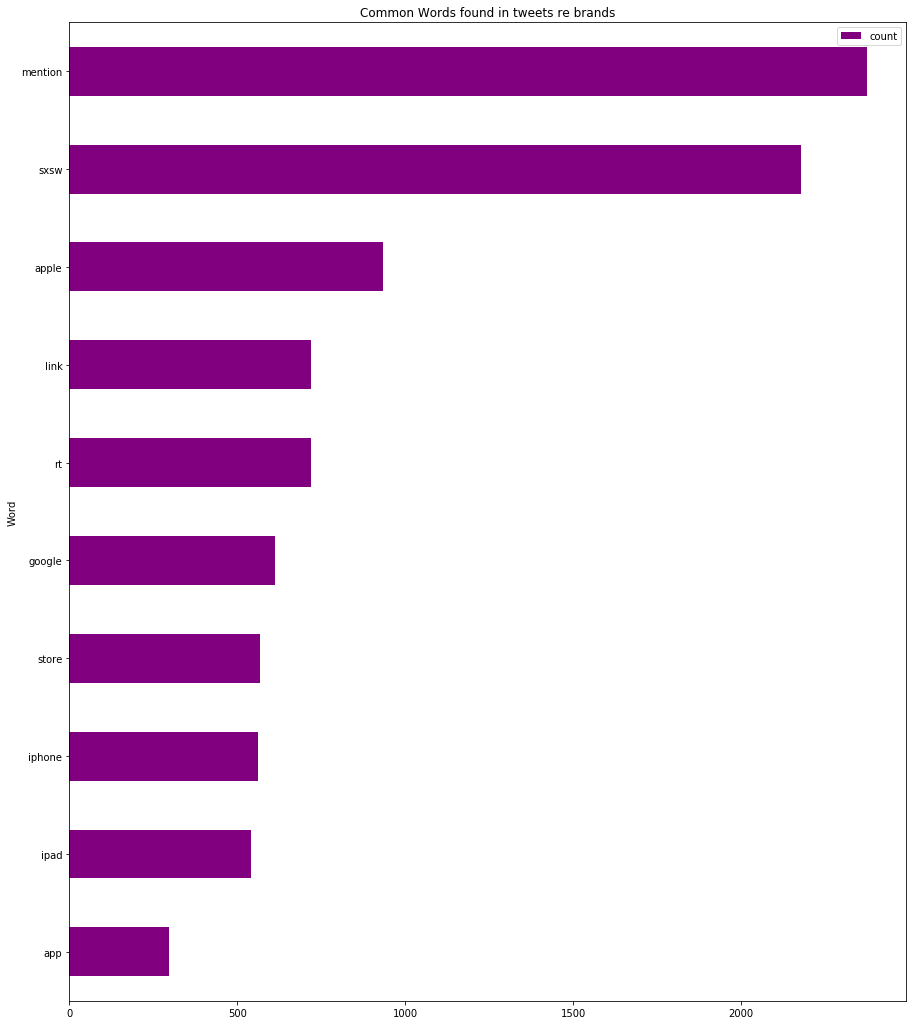

In [298]:
#let's look at common words graph


fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',y='count', ax=ax,color='purple')

ax.set_title("Common Words found in tweets re brands")
plt.show()

In [157]:
!pip install textblob      #for installation

import textblob            #to import
!pip install wordcloud
from textblob import TextBlob, Word
from wordcloud import WordCloud

#make wordcloud

In [158]:
word_counts = ' '.join(top_words_df['Word'].tolist())
print(type(word_counts))

<class 'str'>


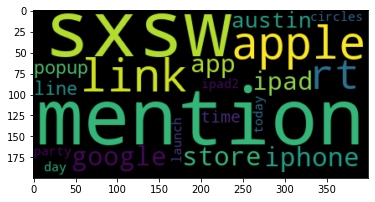

In [159]:
wordcloud = WordCloud().generate(word_counts)
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
plt.show()



In [160]:
#Decide on stemming / lemmatizing

from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(wordsalad):
    token_words=word_tokenize(wordsalad)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=stemSentence(desc_str)
print(x)

wesley83 3g iphon 3 hr tweet rise_austin dead need upgrad plugin station sxsw jessede know fludapp awesom ipadiphon app youll like appreci design also theyr give free ts sxsw swonderlin wait ipad 2 also sale sxsw sxsw hope year festiv isnt crashi year iphon app sxsw sxtxstate great stuff fri sxsw marissa mayer googl tim oreilli tech booksconfer amp matt mullenweg wordpress sxsw start ctia around corner googleio hop skip jump good time android fan beauti smart simpl idea rt madebymani thenextweb wrote hollergram ipad app sxsw httpbitlyieavob count day sxsw plu strong canadian dollar mean stock appl gear excit meet samsungmobileu sxsw show sprint galaxi still run android 21 fail find amp start impromptu parti sxsw hurricaneparti httpbitlygvlrin cant wait til android app come foursquar up game time sxsw httpjmpgrn7pk still prefer gowalla far best look android app date got ta love sxsw googl calendar featur top parti show case check rt hamsandwich via ischaf gthttpbitlyaxzwxb great sxsw ip

In [161]:
from nltk.tokenize import sent_tokenize, word_tokenize
def lemSentence(wordsalad):
    token_words=word_tokenize(wordsalad)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lemma.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=lemSentence(desc_str)
print(x)


#let's just go with lemmatize b/c of the context

# porter = PorterStemmer() #instantiate
# lemma = WordNetLemmatizer() #instantiate
# snow_stemmer = nltk.SnowballStemmer('english')

wesley83 3g iphone 3 hr tweeting rise_austin dead need upgrade plugin station sxsw jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free t sxsw swonderlin wait ipad 2 also sale sxsw sxsw hope year festival isnt crashy year iphone app sxsw sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress sxsw starting ctia around corner googleio hop skip jump good time android fan beautifully smart simple idea rt madebymany thenextweb wrote hollergram ipad app sxsw httpbitlyieavob counting day sxsw plus strong canadian dollar mean stock apple gear excited meet samsungmobileus sxsw show sprint galaxy still running android 21 fail find amp start impromptu party sxsw hurricaneparty httpbitlygvlrin cant wait til android app come foursquare ups game time sxsw httpjmpgrn7pk still prefer gowalla far best looking android app date got ta love sxsw google calendar featuring top party show case check rt 

In [162]:
df.head()

,tweet_text,emotion,lower_desc,char_count,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1


In [163]:
#Let's lemmatize all of our tweet-text and make a new column

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(lower_desc):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(lower_desc)]

df['text_lemmatized'] = df.lower_desc.apply(lemmatize_text)

In [164]:
df.head()

,tweet_text,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [165]:
#cut out the tweet text

df = df.drop(columns=['tweet_text'])
df.head()

,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


## Naive Bayes Modeling


In [166]:
#Set up targets and tf-idf

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
import string




In [167]:
df.head()

#we need to assign a number system to the different classes for the confusion matrix to make sense



,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [168]:
#define a function to appropriately label postive, negative and neutral sentiments

def label(emotion_in):
    emotion_out = 2
    if emotion_in == 'Positive emotion':
        emotion_out = 0
    elif emotion_in == 'Negative emotion':
        emotion_out = 1
    return emotion_out


In [169]:
df.head()

,emotion,lower_desc,char_count,stopwords,text_lemmatized
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [170]:
df['emotionquant'] = df['emotion'].apply(lambda x: label(x))


In [171]:
df.head()

,emotion,lower_desc,char_count,stopwords,text_lemmatized,emotionquant
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a...",1
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"[jessedee, know, fludapp, awesome, ipadiphone,...",0
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"[swonderlin, wait, ipad, 2, also, sale, sxsw]",0
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"[sxsw, hope, year, festival, isnt, crashy, yea...",1
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",0


In [172]:
df['text_lemmatized'] = df['text_lemmatized'].astype(str)

In [173]:
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text_lemmatized'].head()

0    ['wesley83', '3g', 'iphone', '3', 'hr', 'tweet...
1    ['jessedee', 'know', 'fludapp', 'awesome', 'ip...
2    ['swonderlin', 'wait', 'ipad', '2', 'also', 's...
3    ['sxsw', 'hope', 'year', 'festival', 'isnt', '...
4    ['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...
Name: text_lemmatized, dtype: object

In [62]:
#df['text_lemmatized'] = " ".join(df['text_lemmatized'])

In [174]:
df.head()

,emotion,lower_desc,char_count,stopwords,text_lemmatized,emotionquant
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,127,7,"['wesley83', '3g', 'iphone', '3', 'hr', 'tweet...",1
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,139,6,"['jessedee', 'know', 'fludapp', 'awesome', 'ip...",0
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,79,6,"['swonderlin', 'wait', 'ipad', '2', 'also', 's...",0
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,82,5,"['sxsw', 'hope', 'year', 'festival', 'isnt', '...",1
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,131,1,"['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",0


In [175]:

#setting our target & features 
X = df['text_lemmatized']
y = df['emotionquant'] 

# generate a list of stopwords for TfidfVectorizer to ignore
stopwords_list = stopwords.words('english') + list(string.punctuation)



In [176]:
#TD-IF let's vectorize these texts

# generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data

def tfidf(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [177]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

#setting external variable

In [178]:
print(tf_idf_train.shape)
print(tf_idf_test.shape)

(2654, 5153)
(885, 5153)


In [179]:
#training some classifiers 

nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=10)

In [180]:
# a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train): 
    classifier.fit(tf_idf_train, y_train) #fitting this to vectorized data
    train_preds = classifier.predict(tf_idf_train) #making predictions for specific data points 
    test_preds = classifier.predict(tf_idf_test)
    return train_preds, test_preds #return predictions


In [181]:
tf_idf_train.shape

#2654 tweets, 5153 unique words

(2654, 5153)

In [182]:
# generate predictions with Naive Bayes Classifier # setting external variable again and specifying NB classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#decent accuracy score; we have a lot of true positives. what does this mean?  we have so many positive tweets
print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#.85 accuracy ; not bad to start

[[751   0]
 [128   6]]
0.8553672316384181
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       751
           1       1.00      0.04      0.09       134

    accuracy                           0.86       885
   macro avg       0.93      0.52      0.50       885
weighted avg       0.88      0.86      0.79       885



In [183]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
tn, fp, fn, tp

(751, 0, 128, 6)

In [185]:
print(df[df.emotionquant == 0].count())
print(df[df.emotionquant == 1].count())



emotion            2970
lower_desc         2970
char_count         2970
stopwords          2970
text_lemmatized    2970
emotionquant       2970
dtype: int64
emotion            569
lower_desc         569
char_count         569
stopwords          569
text_lemmatized    569
emotionquant       569
dtype: int64


In [186]:
# generate predictions with Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Random Forest Classifier
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))
print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#again we have significantly more true positive cases since we have more positive cases

[[746   5]
 [ 96  38]]
0.8858757062146893
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       751
           1       0.88      0.28      0.43       134

    accuracy                           0.89       885
   macro avg       0.88      0.64      0.68       885
weighted avg       0.89      0.89      0.86       885



In [187]:

tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
tn, fp, fn, tp

(746, 5, 96, 38)

We are significantly skewed in our dataset - much more instances of positive sentiment tweets than negative ones. Let's solve for this.

## Solving for Class Imbalance - using SMOTE

In [188]:

#Import SMOTE and print new distribution

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled, y_train_resampled = smote.fit_sample(tf_idf_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 


Original class distribution: 

0    2970
1     569
Name: emotionquant, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2219
0    2219
Name: emotionquant, dtype: int64


In [189]:

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
print(tn, fp, fn, tp)

#the number of true positives decreased and things seem more evenly distributed, though accuracy went down 
#a few points

#but this has a bigger difference between training/test than rf - looks kinda overfit


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#precision made a big difference even if overall accuracy/f1 score went down a few points -


Multinomial Naive Bayes
Training Accuracy: 0.9626 		 Testing Accuracy: 0.8305

[[637 114]
 [ 36  98]]
0.8305084745762712
637 114 36 98
Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       751
           1       0.46      0.73      0.57       134

    accuracy                           0.83       885
   macro avg       0.70      0.79      0.73       885
weighted avg       0.87      0.83      0.84       885



In [104]:
rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))



Random Forest
Training Accuracy: 0.9975 		 Testing Accuracy: 0.8802

[[738  13]
 [ 93  41]]
0.880225988700565
tn, fp, fn, tp 	 	
738 13 93 41
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       751
           1       0.76      0.31      0.44       134

    accuracy                           0.88       885
   macro avg       0.82      0.64      0.68       885
weighted avg       0.87      0.88      0.86       885



#make a visualization of confusion matrix 

We can see that our models seem a bit overfit so far. 


# Metrics

Now let's decide what this means and what to prioritize in the classification matrix.

Precision - out of all the true positive and false positive (all the tweets we labelled negative), 89% were true positives and had negative sentiment, and the other 11% had positive sentiment but we thought they were negative sentiment

Recall - out of all the true positives and false negative (all actual negative tweets), we got 97% true positives which were actually negative sentiment, and 3% we missed - false negatives - they had negative sentiment and we thought they had positive sentiment

Which error is worse? 

Let's optimize for recall - it's more important that we are conservative and lower our false negatives - so we can see what the negative tweets are saying and if it's worth investigating or responding to for PR. 

In [209]:
#play with factors in our model

#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=100, random_state=50)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#eh it's slightly better, but still overfit

Random Forest
Training Accuracy: 0.9977 		 Testing Accuracy: 0.8712

[[733  18]
 [ 96  38]]
0.8711864406779661
tn, fp, fn, tp 	 	
733 18 96 38
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       751
           1       0.68      0.28      0.40       134

    accuracy                           0.87       885
   macro avg       0.78      0.63      0.66       885
weighted avg       0.85      0.87      0.85       885



In [206]:
#let's try experimenting with max_depth

#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=5)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)
#this distribution didn't change much. accuracy is about the same. weird!  also looks kinda overfit as HELL

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#testing accuracy about the same, slightly higher, but still seems overfit. 


Random Forest
Training Accuracy: 0.9971 		 Testing Accuracy: 0.878

[[734  17]
 [ 91  43]]
0.8779661016949153
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       751
           1       0.72      0.32      0.44       134

    accuracy                           0.88       885
   macro avg       0.80      0.65      0.69       885
weighted avg       0.86      0.88      0.86       885



## Changing train-test-split

Changing for various values of max depth only seems to help minimally, as does n_estimators. Let's try changing train_test_split - the default is .25 test size, let's increase that.

In [210]:
def tfidf2(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 43)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [211]:
tf_idf_train2, tf_idf_test2, y_train2, y_test2, vectorizer2 = tfidf2(X, y, stopwords_list)


In [212]:
#re-smoting the new train test split

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled2, y_train_resampled2 = smote.fit_sample(tf_idf_train2, y_train2) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled2).value_counts()) 

Original class distribution: 

0    2970
1     569
Name: emotionquant, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    1982
0    1982
Name: emotionquant, dtype: int64


In [221]:

rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=13)

rf_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled2)
rf_test_preds = rf_classifier.predict(tf_idf_test2)


rf_train_score = accuracy_score(y_train_resampled2, rf_train_preds)
rf_test_score = accuracy_score(y_test2, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, rf_test_preds))



Random Forest
Training Accuracy: 0.998 		 Testing Accuracy: 0.8767

[[972  16]
 [128  52]]
0.8767123287671232
tn, fp, fn, tp 	 	
972 16 128 52
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       988
           1       0.76      0.29      0.42       180

    accuracy                           0.88      1168
   macro avg       0.82      0.64      0.68      1168
weighted avg       0.87      0.88      0.85      1168



## Changing number of samples in RF

In [229]:
rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=13, max_samples = 1)

rf_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled2)
rf_test_preds = rf_classifier.predict(tf_idf_test2)


rf_train_score = accuracy_score(y_train_resampled2, rf_train_preds)
rf_test_score = accuracy_score(y_test2, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, rf_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, rf_test_preds).ravel()
print("tn, fp, fn, tp \t \t")

print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, rf_test_preds))



Random Forest
Training Accuracy: 0.9977 		 Testing Accuracy: 0.881

[[971  17]
 [122  58]]
0.8809931506849316
tn, fp, fn, tp 	 	
971 17 122 58
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       988
           1       0.77      0.32      0.45       180

    accuracy                           0.88      1168
   macro avg       0.83      0.65      0.69      1168
weighted avg       0.87      0.88      0.86      1168



Testing accuracy has increased slightly from .87! But otherwise, this doesn't seem to be helping much, even after re-sizing the train test split, as training accuracy is still at .99

In [110]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

## NB and changing alpha values

Let's try using NB instead, with the new train test split.


In [222]:

nb = MultinomialNB(alpha=.001)

nb_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled2)
nb_test_preds = nb_classifier.predict(tf_idf_test2)


nb_train_score = accuracy_score(y_train_resampled2, nb_train_preds)
nb_test_score = accuracy_score(y_test2, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, nb_test_preds).ravel()
print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, nb_test_preds))

#well that didn't change anything but this model def seems better and less overfit than the RF

Multinomial Naive Bayes
Training Accuracy: 0.9584 		 Testing Accuracy: 0.8185

[[830 158]
 [ 54 126]]
0.8184931506849316
830 158 54 126
Classification Matrix:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       988
           1       0.44      0.70      0.54       180

    accuracy                           0.82      1168
   macro avg       0.69      0.77      0.71      1168
weighted avg       0.86      0.82      0.83      1168



Changing the train test split seems to have helped with NB! We can see the train accuracy has gone down to .95 from .96, and the test accuracy went down from .83.  

In [223]:
nb = MultinomialNB(alpha=1.0,class_prior=1)

nb_classifier.fit(tf_idf_train_resampled2, y_train_resampled2)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled2)
nb_test_preds = nb_classifier.predict(tf_idf_test2)


nb_train_score = accuracy_score(y_train_resampled2, nb_train_preds)
nb_test_score = accuracy_score(y_test2, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test2, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test2, nb_test_preds)) 


tn, fp, fn, tp = confusion_matrix(y_test2, nb_test_preds).ravel()
print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test2, nb_test_preds))

#this didn't help either

Multinomial Naive Bayes
Training Accuracy: 0.9584 		 Testing Accuracy: 0.8185

[[830 158]
 [ 54 126]]
0.8184931506849316
830 158 54 126
Classification Matrix:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       988
           1       0.44      0.70      0.54       180

    accuracy                           0.82      1168
   macro avg       0.69      0.77      0.71      1168
weighted avg       0.86      0.82      0.83      1168



## Inverse Document Frequency (IDF)

In [232]:
#Let's see what words are important! 

#function that calculates the inverse document frequency(IDF) of each word in our collection
def get_idf(class_, df, stopwords_list):
    docs = df[df.emotionquant==class_].lower_desc
    class_dict = {} 
    for doc in docs:
        words = set(doc.split())
        for word in words:
            if word.lower() not in stopwords_list: 
                class_dict[word.lower()] = class_dict.get(word.lower(), 0) + 1
    idf_df = pd.DataFrame.from_dict(class_dict, orient='index')
    idf_df.columns = ['IDF']
    idf_df.IDF = np.log(len(docs)/idf_df.IDF)
    idf_df = idf_df.sort_values(by="IDF", ascending=True)
    return idf_df.head(20)

In [233]:
get_idf(1 , df, stopwords_list)


,IDF
sxsw,0.014160
mention,0.880049
ipad,1.256284
iphone,1.339934
rt,1.491850
google,1.523599
link,1.748761
apple,1.811281
2,2.300829
app,2.300829


We see quite a few words that may be useful to know drive most tweets, including rt, link, new, mention and sxsw.

## New model, try adding in neutral as a class

Now let's run the same method, except we will add in a third class

In [234]:
file_name = 'original_tweets.csv'
df2 = pd.read_csv(file_name)
df2.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [235]:
df2 = df2.rename(columns = {'emotion_in_tweet_is_directed_at':'brand_or_product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})

In [236]:
df2.head()

,tweet_text,brand_or_product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [237]:
df2 = df2.drop(columns=['brand_or_product'])
df2.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [238]:
df2 = df2.drop_duplicates()

In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9070 non-null   object
 1   emotion     9071 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [240]:
df2[df2.isna().any(axis=1)]
df2 = df2.drop(6)


In [241]:
df2.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [242]:
print(df2[df2.emotion == "I can't tell"].count())
print(df2[df2.emotion == "No emotion toward brand or product"].count())
print(df2[df2.emotion == "Positive emotion"].count())
print(df2[df2.emotion == "Negative emotion"].count())

tweet_text    156
emotion       156
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [243]:
df2 = df2[df2.emotion != "I can't tell"]

In [244]:

print(df2[df2.emotion == "I can't tell"].count())
print(df2[df2.emotion == "No emotion toward brand or product"].count())
print(df2[df2.emotion == "Positive emotion"].count())
print(df2[df2.emotion == "Negative emotion"].count())
df2 = df2.replace("No emotion toward brand or product","Neutral emotion")

tweet_text    0
emotion       0
dtype: int64
tweet_text    5375
emotion       5375
dtype: int64
tweet_text    2970
emotion       2970
dtype: int64
tweet_text    569
emotion       569
dtype: int64


In [245]:
df2['lower_desc'] = df2['tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['lower_desc'].head()


0    .@wesley83 i have a 3g iphone. after 3 hrs twe...
1    @jessedee know about @fludapp ? awesome ipad/i...
2    @swonderlin can not wait for #ipad 2 also. the...
3    @sxsw i hope this year's festival isn't as cra...
4    @sxtxstate great stuff on fri #sxsw: marissa m...
Name: lower_desc, dtype: object

In [246]:

df2['lower_desc'] = df2['lower_desc'].str.replace('[^\w\s]','')
df2['lower_desc'].head()

0    wesley83 i have a 3g iphone after 3 hrs tweeti...
1    jessedee know about fludapp  awesome ipadiphon...
2    swonderlin can not wait for ipad 2 also they s...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: lower_desc, dtype: object

In [247]:
#removing stopwords 


df2['lower_desc'] = df2['lower_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['lower_desc'].head()

0    wesley83 3g iphone 3 hrs tweeting rise_austin ...
1    jessedee know fludapp awesome ipadiphone app y...
2                swonderlin wait ipad 2 also sale sxsw
3    sxsw hope years festival isnt crashy years iph...
4    sxtxstate great stuff fri sxsw marissa mayer g...
Name: lower_desc, dtype: object

In [248]:
#most frequent and least frequent words 

freq = pd.Series(' '.join(df2['lower_desc']).split()).value_counts()[:20]
freq



sxsw       9259
mention    6770
link       4221
rt         2881
ipad       2361
google     2280
apple      2105
iphone     1481
store      1445
new        1073
2          1048
austin      936
app         798
amp         713
launch      637
social      622
circles     598
popup       590
android     556
today       549
dtype: int64

In [249]:
desc_str2 = ' '.join(df2['lower_desc'].tolist())
tokens2 = nltk.word_tokenize(desc_str2)
print(len(tokens2))

110346


In [250]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(lower_desc):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(lower_desc)]

df2['text_lemmatized'] = df2.lower_desc.apply(lemmatize_text)

In [251]:
df2.head()

,tweet_text,emotion,lower_desc,text_lemmatized
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad 2 also sale sxsw,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope years festival isnt crashy years iph...,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [252]:
df2 = df2.drop(columns=['tweet_text'])
df2.head()

,emotion,lower_desc,text_lemmatized
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [253]:


def label(emotion_in):
    emotion_out = 2
    if emotion_in == 'Positive emotion':
        emotion_out = 0
    elif emotion_in == 'Negative emotion':
        emotion_out = 1
    return emotion_out



In [254]:
df2['emotionquant'] = df2['emotion'].apply(lambda x: label(x))


In [255]:
df2.head()

,emotion,lower_desc,text_lemmatized,emotionquant
0,Negative emotion,wesley83 3g iphone 3 hrs tweeting rise_austin ...,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a...",1
1,Positive emotion,jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,...",0
2,Positive emotion,swonderlin wait ipad 2 also sale sxsw,"[swonderlin, wait, ipad, 2, also, sale, sxsw]",0
3,Negative emotion,sxsw hope years festival isnt crashy years iph...,"[sxsw, hope, year, festival, isnt, crashy, yea...",1
4,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",0


In [256]:
df2['text_lemmatized'] = df2['text_lemmatized'].astype(str)
df2['text_lemmatized'] = df2['text_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['text_lemmatized'].head()

0    ['wesley83', '3g', 'iphone', '3', 'hr', 'tweet...
1    ['jessedee', 'know', 'fludapp', 'awesome', 'ip...
2    ['swonderlin', 'wait', 'ipad', '2', 'also', 's...
3    ['sxsw', 'hope', 'year', 'festival', 'isnt', '...
4    ['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...
Name: text_lemmatized, dtype: object

In [257]:
#setting our target & features 
X = df2['text_lemmatized']
y = df2['emotionquant'] 

# generate a list of stopwords for TfidfVectorizer to ignore
stopwords_list = stopwords.words('english') + list(string.punctuation)



In [258]:
#TD-IF let's vectorize these texts

# generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data

def tfidf(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [259]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

#setting external variable

In [260]:
print(tf_idf_train.shape)
print(tf_idf_test.shape)

(6685, 8738)
(2229, 8738)


In [261]:
#training some classifiers 

nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=10)

In [262]:
#SMOTE

#Import SMOTE and print new distribution

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled, y_train_resampled = smote.fit_sample(tf_idf_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

2    5375
0    2970
1     569
Name: emotionquant, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    4019
1    4019
0    4019
Name: emotionquant, dtype: int64


In [263]:
nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
#print(tn, fp, fn, tp)

#


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#Testing accuracy is awful, recall is quite poor for 0


Multinomial Naive Bayes
Training Accuracy: 0.8656 		 Testing Accuracy: 0.5967

[[489  76 170]
 [ 33  81  24]
 [446 150 760]]
0.5966801256168686
Classification Matrix:
              precision    recall  f1-score   support

           0       0.51      0.67      0.57       735
           1       0.26      0.59      0.36       138
           2       0.80      0.56      0.66      1356

    accuracy                           0.60      2229
   macro avg       0.52      0.60      0.53      2229
weighted avg       0.67      0.60      0.61      2229



In [264]:
rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)

print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#Results are even worse

Random Forest
Training Accuracy: 0.993 		 Testing Accuracy: 0.6613

[[ 409    7  319]
 [  24   37   77]
 [ 301   27 1028]]
0.661283086585913
Classification Matrix:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       735
           1       0.52      0.27      0.35       138
           2       0.72      0.76      0.74      1356

    accuracy                           0.66      2229
   macro avg       0.60      0.53      0.55      2229
weighted avg       0.66      0.66      0.66      2229



## Metrics for 3-classes?


This gets trickier - 1 is negative, 0 is positive, and 2 is neutral
Earlier we said recall for positive sentiments

Let's do the same thing - optimize recall for postiive sentiments so we are reducing the false negatives. 

Our results so far are not great, let's try to improve it

In [282]:
#rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)
rf = RandomForestClassifier(n_estimators=100, random_state=20)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))

#N estimators doesn't seem to affect recall - slight increase here but not much


Random Forest
Training Accuracy: 0.9925 		 Testing Accuracy: 0.6667

[[ 418    6  311]
 [  26   33   79]
 [ 300   21 1035]]
0.6666666666666666
Classification Matrix:
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       735
           1       0.55      0.24      0.33       138
           2       0.73      0.76      0.74      1356

    accuracy                           0.67      2229
   macro avg       0.61      0.52      0.55      2229
weighted avg       0.66      0.67      0.66      2229



## Changing max depth

In [285]:

rf = RandomForestClassifier(n_estimators=100, random_state=20,max_depth=3)

rf_classifier.fit(tf_idf_train_resampled, y_train_resampled)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled)
rf_test_preds = rf_classifier.predict(tf_idf_test)


rf_train_score = accuracy_score(y_train_resampled, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test, rf_test_preds))
#it slightly improves 

Random Forest
Training Accuracy: 0.9915 		 Testing Accuracy: 0.6465

[[426  10 299]
 [ 27  39  72]
 [352  28 976]]
0.6464782413638402
Classification Matrix:
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       735
           1       0.51      0.28      0.36       138
           2       0.72      0.72      0.72      1356

    accuracy                           0.65      2229
   macro avg       0.59      0.53      0.55      2229
weighted avg       0.65      0.65      0.64      2229



Slight improvement in recall. Let's try NB

# NB improvements

In [286]:

nb = MultinomialNB(alpha=.01)

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
#print(tn, fp, fn, tp)

#


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))

#not helpful

Multinomial Naive Bayes
Training Accuracy: 0.8656 		 Testing Accuracy: 0.5967

[[489  76 170]
 [ 33  81  24]
 [446 150 760]]
0.5966801256168686
Classification Matrix:
              precision    recall  f1-score   support

           0       0.51      0.67      0.57       735
           1       0.26      0.59      0.36       138
           2       0.80      0.56      0.66      1356

    accuracy                           0.60      2229
   macro avg       0.52      0.60      0.53      2229
weighted avg       0.67      0.60      0.61      2229



No notable changes but at least NB is not as overfit as RF.

In [287]:
nb = MultinomialNB(alpha=.01, class_prior=1)

nb_classifier.fit(tf_idf_train_resampled, y_train_resampled)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled)
nb_test_preds = nb_classifier.predict(tf_idf_test)


nb_train_score = accuracy_score(y_train_resampled, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test, nb_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
#print(tn, fp, fn, tp)

#


print('Classification Matrix:')
print(classification_report(y_test, nb_test_preds))



Multinomial Naive Bayes
Training Accuracy: 0.8656 		 Testing Accuracy: 0.5967

[[489  76 170]
 [ 33  81  24]
 [446 150 760]]
0.5966801256168686
Classification Matrix:
              precision    recall  f1-score   support

           0       0.51      0.67      0.57       735
           1       0.26      0.59      0.36       138
           2       0.80      0.56      0.66      1356

    accuracy                           0.60      2229
   macro avg       0.52      0.60      0.53      2229
weighted avg       0.67      0.60      0.61      2229



With 3 classes, the NB seems to be a better model, approaching .67 recall for positive sentiment. This still needs some improvement as it's overfit, but much better than RF.  

Let's go ahead and update the train test split, test-size again and attempt another NB model.

# Changing train-test split size

In [288]:
def tfidf3(X, y, stopwords_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 43)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list) #initialize
    tf_idf_train = vectorizer.fit_transform(X_train) #transformed the data
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer #vectorized data

In [289]:
tf_idf_train3, tf_idf_test3, y_train3, y_test3, vectorizer3 = tfidf3(X, y, stopwords_list)


In [290]:
#re-smoting the new train test split

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
tf_idf_train_resampled3, y_train_resampled3 = smote.fit_sample(tf_idf_train3, y_train3) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled3).value_counts()) 

Original class distribution: 

2    5375
0    2970
1     569
Name: emotionquant, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    3634
1    3634
0    3634
Name: emotionquant, dtype: int64


In [291]:
nb = MultinomialNB(alpha=.01, class_prior=1)

nb_classifier.fit(tf_idf_train_resampled3, y_train_resampled3)
nb_train_preds = nb_classifier.predict(tf_idf_train_resampled3)
nb_test_preds = nb_classifier.predict(tf_idf_test3)


nb_train_score = accuracy_score(y_train_resampled3, nb_train_preds)
nb_test_score = accuracy_score(y_test3, nb_test_preds)


print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test3, nb_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test3, nb_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, nb_test_preds).ravel()
#print(tn, fp, fn, tp)

#


print('Classification Matrix:')
print(classification_report(y_test3, nb_test_preds))


Multinomial Naive Bayes
Training Accuracy: 0.864 		 Testing Accuracy: 0.5955

[[658  93 257]
 [ 32 110  51]
 [589 168 984]]
0.5955132562882393
Classification Matrix:
              precision    recall  f1-score   support

           0       0.51      0.65      0.58      1008
           1       0.30      0.57      0.39       193
           2       0.76      0.57      0.65      1741

    accuracy                           0.60      2942
   macro avg       0.52      0.60      0.54      2942
weighted avg       0.65      0.60      0.61      2942



This doesn't seem to have helped - in fact recall went down a couple percentage points from earlier. Let's try RF again and see if the new train test split size has helped.

In [292]:
rf = RandomForestClassifier(n_estimators=100, random_state=20,max_depth=3)

rf_classifier.fit(tf_idf_train_resampled3, y_train_resampled3)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled3)
rf_test_preds = rf_classifier.predict(tf_idf_test3)


rf_train_score = accuracy_score(y_train_resampled3, rf_train_preds)
rf_test_score = accuracy_score(y_test3, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test3, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test3, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test3, rf_test_preds))


Random Forest
Training Accuracy: 0.9931 		 Testing Accuracy: 0.637

[[ 497    8  503]
 [  39   52  102]
 [ 376   40 1325]]
0.636981645139361
Classification Matrix:
              precision    recall  f1-score   support

           0       0.54      0.49      0.52      1008
           1       0.52      0.27      0.35       193
           2       0.69      0.76      0.72      1741

    accuracy                           0.64      2942
   macro avg       0.58      0.51      0.53      2942
weighted avg       0.63      0.64      0.63      2942



## Changing number of samples

In [295]:
rf = RandomForestClassifier(n_estimators=100, random_state=20,max_depth=3, max_samples=7)

rf_classifier.fit(tf_idf_train_resampled3, y_train_resampled3)
rf_train_preds = rf_classifier.predict(tf_idf_train_resampled3)
rf_test_preds = rf_classifier.predict(tf_idf_test3)


rf_train_score = accuracy_score(y_train_resampled3, rf_train_preds)
rf_test_score = accuracy_score(y_test3, rf_test_preds)


print("Random Forest")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("")

# evaluate performance of RF Classifier
print(confusion_matrix(y_test3, rf_test_preds)) #we're testing it, comparing our predictions with y test
print(accuracy_score(y_test3, rf_test_preds)) 


#tn, fp, fn, tp = confusion_matrix(y_test, rf_test_preds).ravel()
#print("tn, fp, fn, tp \t \t")

#print(tn, fp, fn, tp)


print('Classification Matrix:')
print(classification_report(y_test3, rf_test_preds))

Random Forest
Training Accuracy: 0.993 		 Testing Accuracy: 0.6455

[[ 498    8  502]
 [  35   57  101]
 [ 364   33 1344]]
0.6454792658055745
Classification Matrix:
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      1008
           1       0.58      0.30      0.39       193
           2       0.69      0.77      0.73      1741

    accuracy                           0.65      2942
   macro avg       0.61      0.52      0.55      2942
weighted avg       0.64      0.65      0.64      2942



This is very overfit and reduced recall for positive tweets significantly. 

The prior NB model is recommended as it had the highest recall, and was the least overfit of the various models we have fine tuned.

## Conclusion

In conclusion:

1) Promoting launch events seems to drive a significant proportion of product-related tweets

2) Using social media giveaways to encourage re-tweets or links to your product, also seems to drive a significant amount of product-related tweets

3) Focus PR resources on analyzing negative-sentiment tweets and deciding which types of negative tweets are worth addressing

## Future Work

1) Use additional resources to fine-tune the current models ie GridSearch

2) Further feature-engineering: Calculate a new model based on a list of specific, important words that have strong sentiment one way or another [ie tweets with “great”, “awful”, or “terrible” in them] 

3) Obtain more tweet-data from other tech companies, particularly small startups and PR companies
